In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
class Bandit:
    def RewardFn(self, arm):
        if arm == 3:
            return 10.0
        elif arm == 8:
            return 7.0
        else:
            return -1
        
    def __init__(self, K):
        self.K = K
        self.total = 0
        self.rewards = np.random.normal(0, 1, (K, ))
        self.records = np.zeros_like(self.rewards)
        self.history = []
        for i in range(K):
            self.records[i] = 0
            self.rewards[i] += self.RewardFn(i)
        self.n = 0
        

    def getArm(self):
         return np.argmax(np.exp(self.rewards)/np.sum(np.exp(self.rewards)))
        
    def Pull(self):
        arm = self.getArm()
        self.records[arm] += 1
        currReward = self.RewardFn(arm)
        self.total += currReward
        self.history.append(self.total)
        self.rewards[arm] = (self.rewards[arm] * self.n + currReward)/(self.n + 1) 
        self.n += 1

In [54]:
agent = Bandit(10)

In [55]:
for i in range(1000):
    agent.Pull()

In [57]:
agent.records

array([   0.,    0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,
          0.])

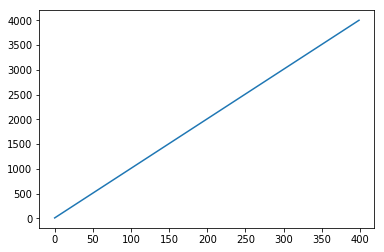

In [58]:
plt.plot(agent.history[:400])

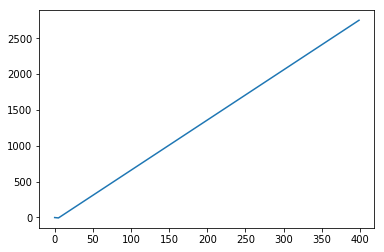

In [51]:
plt.plot(agent.history[:400])